In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import re
import os
import pandas as pd

### Esecuzione Reasoning

In [4]:
reasoning = "../reasoner/encoding/reasoning.asp"
facts = ["../reasoner/net/IMG_4416_warp_net.asp",
         "../reasoner/cad/0A00018253.04_cad.asp"]
#facts = ["./facts/0A00018253.04_cad_normalized2.asp","./facts/IMG_4416_warp_net_normalized2.asp"]

facts=' '.join(facts)
#facts = ["./facts/cad1.asp","./facts/net1.asp"]
#facts = ["./facts/prova_cad_normalized2.asp","./facts/prova_net_normalized2.asp"]

In [ ]:
out = os.popen(f'./DLV2 {reasoning} {facts} --printonlyoptimum').read()
out = re.split("}",out)
out = out[-2]
outputReasoning = re.split(", |{",out)

In [48]:
#print(outputReasoning)

In [49]:
filterPredicates = ["distance","relCad","absent","excess"]
filterPredicates = ["numRelationsCad","numRelationsNet","absent"]
filterPredicates = ["cad("]
for x in outputReasoning:
    for y in filterPredicates:
        if y.lower() in x.lower():
            print(x)
            break

cad("13",1,21,210,936,2210)
cad("18",7,0,4473,851,9289)
cad("18",8,893,4421,1659,9342)
cad("13",2,1042,210,1787,2157)
cad("19",9,1765,4342,2553,9368)
cad("14",3,1808,0,2319,2473)
cad("15",4,2425,605,2638,2184)
cad("19",10,2595,4473,3404,9368)
cad("16",5,2723,552,3085,2105)
cad("17",6,3170,342,8617,2105)
cad("20",11,3638,5815,4829,8815)
cad("21",12,4914,6236,5702,8552)
cad("22",13,5851,5684,7021,9052)
cad("23",14,7191,6157,8446,8552)
cad("24",15,8829,8578,9957,10000)
cad("25",16,8978,4315,9382,7236)
cad("25",17,9617,4289,10000,7368)
mappedCad(12)
mappedCad(13)
mappedCad(10)
mappedCad(15)
mappedCad(11)
mappedCad(6)
mappedCad(1)
mappedCad(3)
mappedCad(14)


### Parsing reasoning output

In [50]:
net = []
cad = []
relNet = []
relCad = []
absentComponents = []
inExcessComponents = []
absentRelations = []
inExcessRelations = []
mapping = {}
cadNet = {}
info_nodes = {}
distanceThreshold = []
for x in outputReasoning:
    if "net(" in x:
        x=x.replace("net","")
        x = eval(x)
        net.append(x)
        info_nodes[('net',x[1])]=x
    elif "cad(" in x:
        x=x.replace("cad","")
        x = eval(x)
        cad.append(x)
        info_nodes[('cad',x[1])]=x
    elif "limitedRel(" in x:
        x=x.replace("limitedRel","")
        x = eval(x)
        if x[4]=="cad":
            relCad.append(x)
        else:
            relNet.append(x)
    elif "absent(" in x:
        x=x.replace("absent","")
        absentComponents.append(eval(x))
    elif "excess(" in x:
        x=x.replace("excess","")
        inExcessComponents.append(eval(x))
    elif "absentRel(" in x:
        x=x.replace("absentRel","")
        absentRelations.append(eval(x))
    elif "excessRel(" in x:
        x=x.replace("excessRel","")
        inExcessRelations.append(eval(x))
    elif "mapping(" in x:
        x=x.replace("mapping","")
        x = eval(x)
        mapping[x[1]]=x[0]
        cadNet[x[0]] = x[1]
    elif "distanceThreshold(" in x:
        x=x.replace("distanceThreshold","")
        distanceThreshold.append(eval(x))

### Rappresentazione visiva Grafi

In [51]:
class Graph:
    def __init__(self,nodes,pos,borderNodes = 'skyblue', colorNodes = 'lightgreen'):
        self.graph = nx.DiGraph()
        self.graph.add_nodes_from(nodes)
        self.pos = pos
        self.colorNodes = [colorNodes for i in range(len(nodes))]
        self.borderNodes = [borderNodes for i in range(len(nodes))]
        self.node_size = 1000
    
    def addNode(self,node,pos, color='gray',borderNodes='skyblue'):
        if node not in self.graph.nodes:
            self.graph.add_node(node)
            self.pos[node]=pos
            self.colorNodes.append(color)
            self.borderNodes.append(borderNodes)

    def addEdge(self,edge,label=""):
        self.graph.add_edge(*edge, label = label)
    
    def draw(self):
        nx.draw(self.graph,self.pos,with_labels=True,node_size=self.node_size,edgecolors=self.borderNodes,node_color=self.colorNodes)
        nx.draw_networkx_edge_labels(self.graph,self.pos,edge_labels=nx.get_edge_attributes(self.graph,'label'))
    
    def updateNode(self,node,color=-1,border=-1):
        for pos,x in enumerate(self.graph.nodes):
            if x==node:
                if color!=-1:
                    self.colorNodes[pos]=color
                if border!=-1:
                    self.borderNodes[pos]=border
                break

In [52]:
def getCenter(S,D):
    x1,y1 = S
    x2,y2 = D 
    return (x1+x2)/2, (y1+y2)/2

In [53]:
nodes = []
pos = {}
for x in cad:
    cx,cy=getCenter(x[2:4],x[4:6])
    nodes.append(f"{x[0]}-{x[1]}")
    pos[f"{x[0]}-{x[1]}"] = [cx,cy]
    
cadGraph = Graph(nodes,pos,colorNodes="lightblue")

for x in relCad:
    c1 = info_nodes[("cad",x[0])][0]
    c2 = info_nodes[("cad",x[1])][0]
    cadGraph.addEdge((f"{c1}-{x[0]}",f"{c2}-{x[1]}"),label=f"{x[3]}-{x[2]}")
    

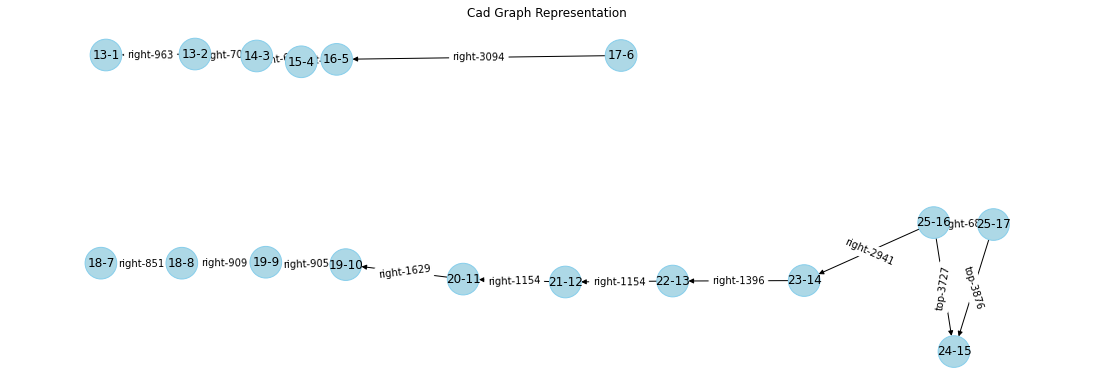

In [54]:
fig = plt.figure(figsize=(15,5))

cadGraph.draw()
plt.title("Cad Graph Representation")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

In [55]:
nodes = []
pos = {}
for x in net:
    cx,cy=getCenter(x[2:4],x[4:6])
    t1 = mapping[x[1]] if x[1] in mapping else x[1]
    node = f"{x[0]}-{t1}"
    nodes.append(node)
    pos[node]=[cx,cy]
netGraph = Graph(nodes,pos)

for x in relNet:
    c1 = info_nodes[("net",x[0])][0]
    c2 = info_nodes[("net",x[1])][0]
    t1 = mapping[x[0]] if x[0] in mapping else x[0]
    t2 = mapping[x[1]] if x[1] in mapping else x[1]
    netGraph.addEdge((f"{c1}-{t1}",f"{c2}-{t2}"),f"{x[3]}-{x[2]}")    

In [56]:
#fig = plt.figure(figsize=(20,5))
#netGraph.draw()

#plt.title("Comparazione")
#ax = plt.gca()
#ax.invert_yaxis()
#plt.show()

### Absent and Inexcess Components

In [57]:
print(f"\033[1mComponenti Assenti:\033[0m\n{absentComponents}" if len(absentComponents) >0 else "",end="")
print(f"\n\033[1mComponenti in eccesso:\033[0m\n{inExcessComponents}"if len(inExcessComponents) >0 else "",end="")

Componenti Assenti:
[('25', 17), ('18', 8), ('18', 7), ('15', 4), ('25', 16), ('16', 5), ('13', 2), ('19', 9)]
Componenti in eccesso:
[('14', 11), ('23', 12), ('23', 9)]

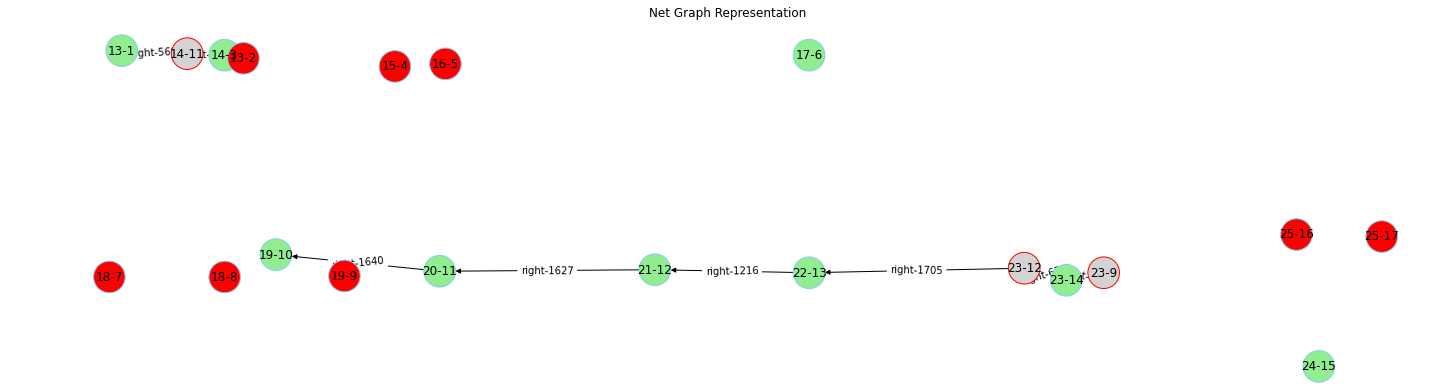

In [58]:
for ab in absentComponents:
    x = info_nodes[('cad',ab[1])]
    cx,cy=getCenter(x[2:4],x[4:6])
    netGraph.addNode(f"{x[0]}-{x[1]}",[cx,cy],"red")


for ex in inExcessComponents:
    netGraph.updateNode(f"{ex[0]}-{ex[1]}",border="red",color="lightgray")
    
fig = plt.figure(figsize=(20,5))
netGraph.draw()
plt.title("Net Graph Representation")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

### Absent and Inexcess Relations

In [59]:
print(f"\033[1mRelazioni Assenti:\033[0m\n{absentRelations}" if len(absentRelations) >0 else "",end="")
print(f"\n\n\033[1mRelazioni in eccesso:\033[0m\n{inExcessRelations}"if len(inExcessRelations) >0 else "",end="")

Relazioni Assenti:
[('23', 14, '22', 13, 2, 6)]

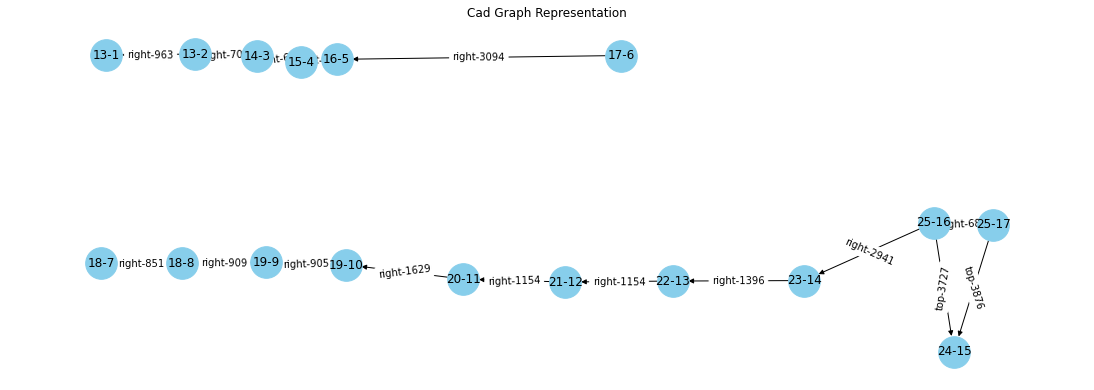

In [11]:
cadGraph = nx.DiGraph()
pos={}
for x in cad:
    cx,cy=getCenter(x[2:4],x[4:6])
    cadGraph.add_node(f"{x[0]}-{x[1]}")
    pos[f"{x[0]}-{x[1]}"] = [cx,cy]
    
for x in relCad:
    c1 = info_nodes[("cad",x[0])][0]
    c2 = info_nodes[("cad",x[1])][0]
    cadGraph.add_edge(f"{c1}-{x[0]}",f"{c2}-{x[1]}",label=f"{x[3]}-{x[2]}")
    
fig = plt.figure(figsize=(15,5))

nx.draw(cadGraph,pos,with_labels=True,node_size=1000,node_color="skyblue")
nx.draw_networkx_edge_labels(cadGraph,pos,edge_labels=nx.get_edge_attributes(cadGraph,'label'))

plt.title("Cad Graph Representation")
ax = plt.gca()
ax.invert_yaxis()
plt.show()

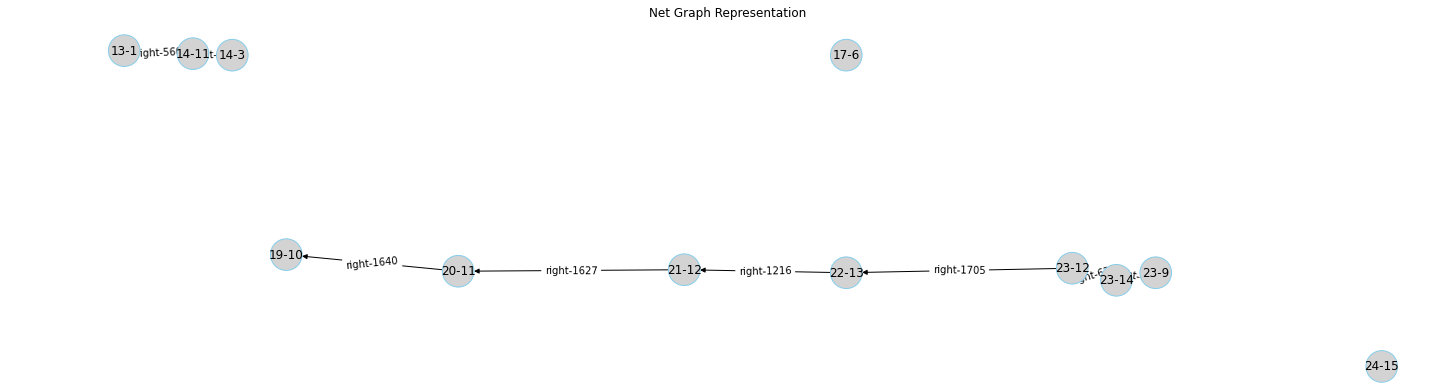

In [60]:
netGraph = nx.DiGraph()
pos={}
color_map = []
edgecolors = []
for x in net:
    cx,cy=getCenter(x[2:4],x[4:6])
    t1 = mapping[x[1]] if x[1] in mapping else x[1]
    node = f"{x[0]}-{t1}"
    netGraph.add_node(node)
    pos[node] = [cx,cy]
    color_map.append("lightgray")
    
for x in relNet:
    c1 = info_nodes[("net",x[0])][0]
    c2 = info_nodes[("net",x[1])][0]
    t1 = mapping[x[0]] if x[0] in mapping else x[0]
    t2 = mapping[x[1]] if x[1] in mapping else x[1]
    netGraph.add_edge(f"{c1}-{t1}",f"{c2}-{t2}",label=f"{x[3]}-{x[2]}")
    
fig = plt.figure(figsize=(20,5))

nx.draw(netGraph,pos,with_labels=True,node_size=1000,edgecolors="skyblue",node_color=color_map)
nx.draw_networkx_edge_labels(netGraph,pos,edge_labels=nx.get_edge_attributes(netGraph,'label'))

plt.title("Net Graph Representation")
ax = plt.gca()
ax.invert_yaxis()
plt.show()